In [1]:
from gensim.models import Word2Vec
  
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np 
  
from sklearn import cluster
from sklearn import metrics

import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

In [5]:
sentences = [['this', 'is', 'the', 'one','good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'book'],
            ['one', 'more', 'book'],
            ['weather', 'rain', 'snow'],
            ['yesterday', 'weather', 'snow'],
            ['forecast', 'tomorrow', 'rain', 'snow'],
            ['this', 'is', 'the', 'new', 'post'],
            ['this', 'is', 'about', 'more', 'machine', 'learning', 'post'],  
            ['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']]
  
  
 
model = Word2Vec(sentences, min_count=1)
#print(model)

Word2Vec(vocab=21, size=100, alpha=0.025)


In [3]:
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

In [ ]:
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, model))   

# X representa todas las palabras en un numero de relevancia, ubicadas en un array

In [ ]:
# note with some version you would need use this (without wv) 
#  model[model.vocab] 
print (model[model.wv.vocab])
print (model.similarity('post', 'book'))
print (model.most_similar(positive=['machine'], negative=[], topn=2))

In [8]:
NUM_CLUSTERS=2
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)

[0, 0, 1, 1, 1, 1, 0, 0, 0]


In [ ]:
for index, sentence in enumerate(sentences):    
    print (str(assigned_clusters[index]) + ":" + str(sentence))

kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
  
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)

0 ['this', 'is', 'the', 'one', 'good', 'machine', 'learning', 'book']
0 ['this', 'is', 'another', 'book']
1 ['one', 'more', 'book']
1 ['weather', 'rain', 'snow']
1 ['yesterday', 'weather', 'snow']
1 ['forecast', 'tomorrow', 'rain', 'snow']
0 ['this', 'is', 'the', 'new', 'post']
0 ['this', 'is', 'about', 'more', 'machine', 'learning', 'post']
0 ['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']


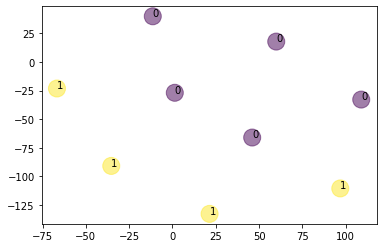

In [11]:
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)

plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
 
for j in range(len(sentences)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   print ("%s %s" % (assigned_clusters[j],  sentences[j]))
 
 
plt.show()